In [1]:
%pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", path)

100%|██████████| 86.8M/86.8M [00:00<00:00, 117MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/3


In [3]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/3"

for folder in os.listdir(dataset_path):
    print(folder)
    subpath = os.path.join(dataset_path, folder)
    if os.path.isdir(subpath):
        print("   → Subfolders:", os.listdir(subpath)[:5])


Training
   → Subfolders: ['meningioma_tumor', 'glioma_tumor', 'no_tumor', 'pituitary_tumor']
Testing
   → Subfolders: ['meningioma_tumor', 'glioma_tumor', 'no_tumor', 'pituitary_tumor']


In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define paths
base_path = "/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/3"
train_path = os.path.join(base_path, "Training")
test_path = os.path.join(base_path, "Testing")

# Check dataset statistics
def analyze_dataset():
    print("=== DATASET ANALYSIS ===")
    
    for split_name, split_path in [("Training", train_path), ("Testing", test_path)]:
        print(f"\n{split_name} Set:")
        total_images = 0
        class_counts = {}
        
        for class_name in os.listdir(split_path):
            class_path = os.path.join(split_path, class_name)
            if os.path.isdir(class_path):
                num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
                class_counts[class_name] = num_images
                total_images += num_images
                print(f"  {class_name}: {num_images} images")
        
        print(f"  Total: {total_images} images")
        
    return class_counts

# Run analysis
class_counts = analyze_dataset()

=== DATASET ANALYSIS ===

Training Set:
  meningioma_tumor: 822 images
  glioma_tumor: 826 images
  no_tumor: 395 images
  pituitary_tumor: 827 images
  Total: 2870 images

Testing Set:
  meningioma_tumor: 115 images
  glioma_tumor: 100 images
  no_tumor: 105 images
  pituitary_tumor: 74 images
  Total: 394 images


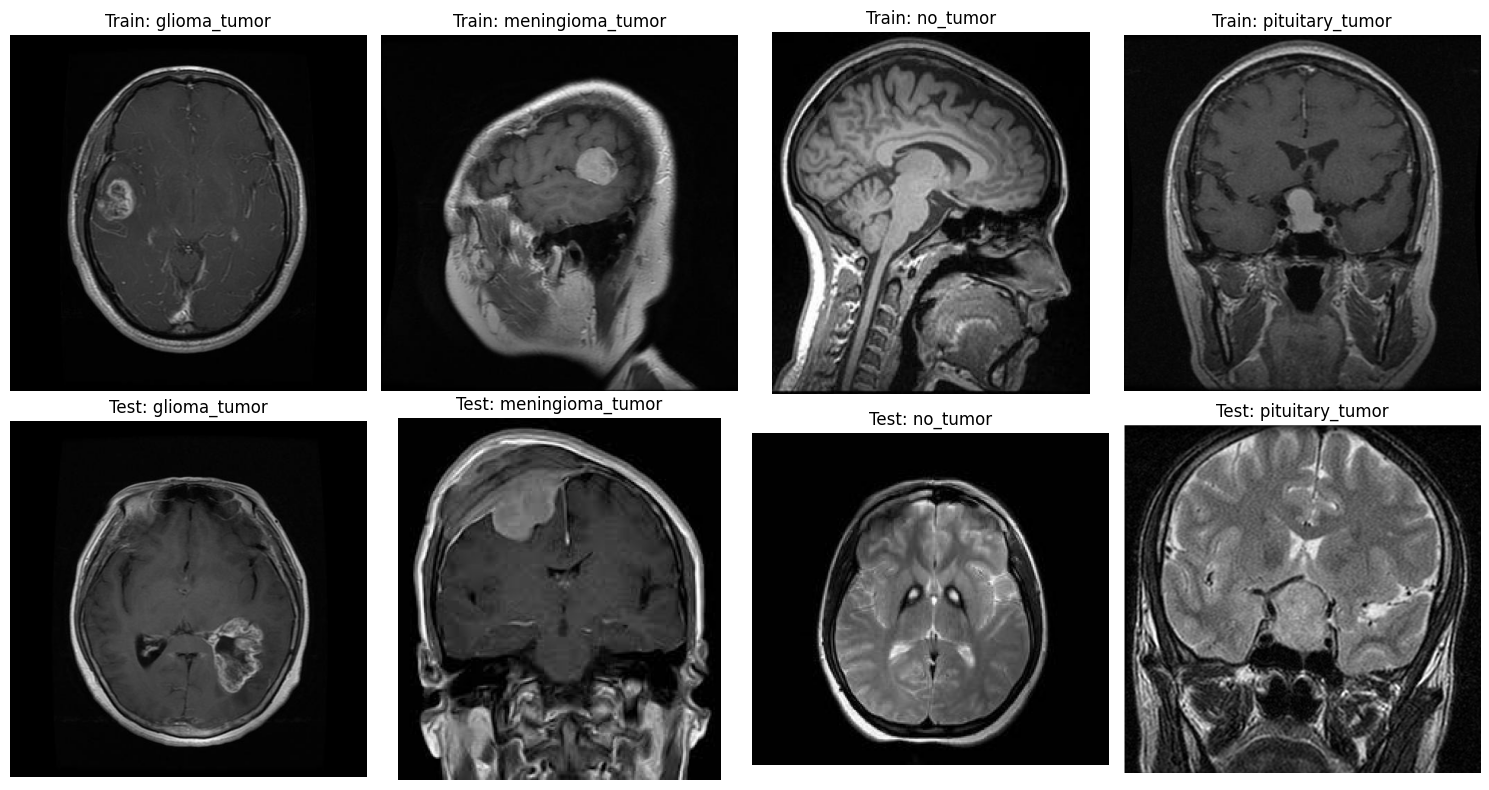

In [5]:
def visualize_samples():
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    
    for i, class_name in enumerate(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']):
        # Training samples
        class_path = os.path.join(train_path, class_name)
        sample_image = os.listdir(class_path)[0]
        img = plt.imread(os.path.join(class_path, sample_image))
        
        axes[0, i].imshow(img, cmap='gray')
        axes[0, i].set_title(f"Train: {class_name}")
        axes[0, i].axis('off')
        
        # Testing samples
        class_path = os.path.join(test_path, class_name)
        sample_image = os.listdir(class_path)[0]
        img = plt.imread(os.path.join(class_path, sample_image))
        
        axes[1, i].imshow(img, cmap='gray')
        axes[1, i].set_title(f"Test: {class_name}")
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_samples()

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


2025-10-21 12:38:00.724610: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-21 12:38:01.215320: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-21 12:38:01.215436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-21 12:38:01.294972: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-21 12:38:01.461030: I tensorflow/core/platform/cpu_feature_guar

Found 2870 files belonging to 4 classes.


2025-10-21 12:38:05.570200: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-21 12:38:05.887037: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-21 12:38:05.887363: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 394 files belonging to 4 classes.
Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Train samples: 2284
Validation samples: 489
Test samples: 491


2025-10-21 12:38:09.876840: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


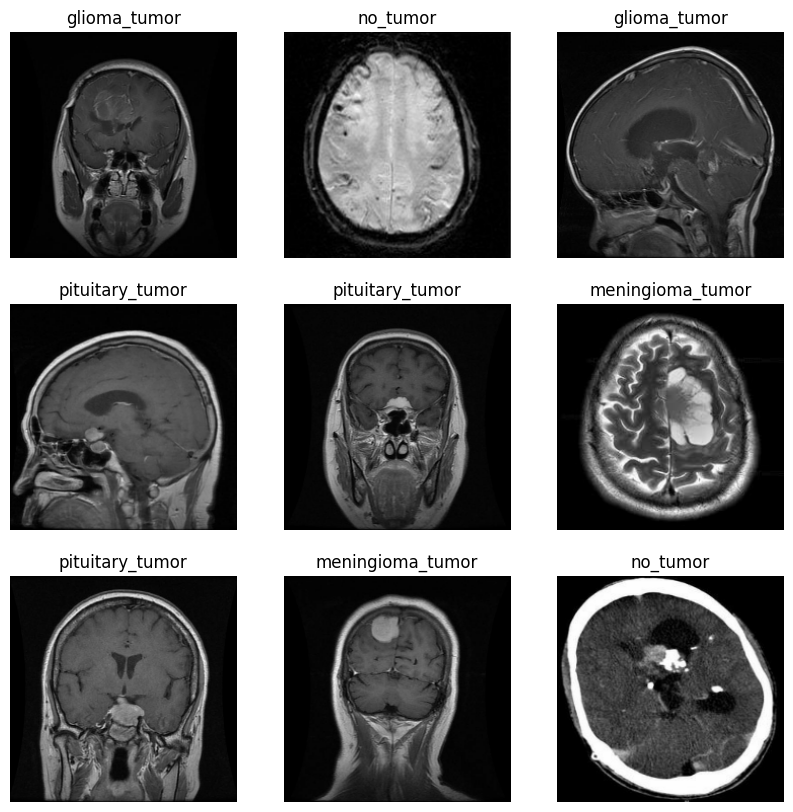

In [7]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 📁 Dataset Paths
# ==========================
base_path = "/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/3"
train_path = os.path.join(base_path, "Training")
test_path = os.path.join(base_path, "Testing")

# ==========================
# 📸 Load both train + test (unbatched)
# ==========================
all_data = []
for split_dir in [train_path, test_path]:
    ds = tf.keras.utils.image_dataset_from_directory(
        split_dir,
        labels="inferred",
        label_mode="categorical",
        image_size=(224, 224),
        batch_size=None,   # <--- no batching here
        shuffle=True,
        seed=123
    )
    all_data.append(ds)

# Combine both datasets
dataset = all_data[0].concatenate(all_data[1])

# ==========================
# ✂️ Split: 70% Train, 15% Val, 15% Test
# ==========================
dataset_size = sum(1 for _ in dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)

dataset = dataset.shuffle(buffer_size=dataset_size, seed=123)

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size)

# ==========================
# ⚡ Batch + Optimize
# ==========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.batch(32).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.batch(32).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.batch(32).cache().prefetch(buffer_size=AUTOTUNE)

# ==========================
# ✅ Check Data
# ==========================
class_names = all_data[0].class_names
print("Classes:", class_names)
print("Train samples:", train_size)
print("Validation samples:", val_size)
print("Test samples:", dataset_size - train_size - val_size)

# ==========================
# 🖼️ Show Example Images
# ==========================
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.show()


In [8]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GlobalAveragePooling2D

In [9]:
model = Sequential([
    Conv2D(32,(3,3), input_shape=(224,224,3)),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3)),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3)),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    GlobalAveragePooling2D(),

    Dense(256),
    Activation('relu'),
    BatchNormalization(),
    
    Dense(4, activation='softmax')
])

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    
]


model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=metrics)

model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0

Epoch 1/50


2025-10-21 12:38:35.890565: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-10-21 12:38:37.978655: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3d49247d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-21 12:38:37.978703: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2025-10-21 12:38:37.995741: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1761050318.116051     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


72/72 [==============================] - 13s 77ms/step - loss: 0.9617 - accuracy: 0.6178 - precision: 0.6757 - recall: 0.4899 - auc: 0.8448 - val_loss: 3.2696 - val_accuracy: 0.1595 - val_precision: 0.1585 - val_recall: 0.1513 - val_auc: 0.4699 - lr: 0.0010
Epoch 2/50
72/72 [==============================] - 3s 38ms/step - loss: 0.7387 - accuracy: 0.7032 - precision: 0.7507 - recall: 0.6248 - auc: 0.9062 - val_loss: 2.0710 - val_accuracy: 0.2740 - val_precision: 0.3406 - val_recall: 0.1922 - val_auc: 0.5455 - lr: 0.0010
Epoch 3/50
72/72 [==============================] - 3s 36ms/step - loss: 0.6584 - accuracy: 0.7233 - precision: 0.7662 - recall: 0.6799 - auc: 0.9249 - val_loss: 1.9525 - val_accuracy: 0.4008 - val_precision: 0.4906 - val_recall: 0.2679 - val_auc: 0.6138 - lr: 0.0010
Epoch 4/50
72/72 [==============================] - 2s 34ms/step - loss: 0.5880 - accuracy: 0.7710 - precision: 0.8010 - recall: 0.7294 - auc: 0.9398 - val_loss: 0.7730 - val_accuracy: 0.7219 - val_precisio

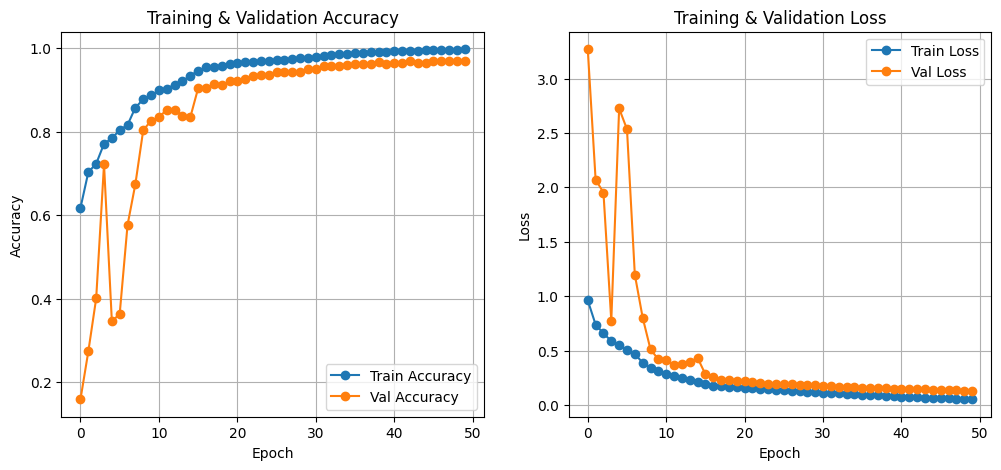

loss: 0.1699
accuracy: 0.9511
precision: 0.9529
recall: 0.9470
auc: 0.9923


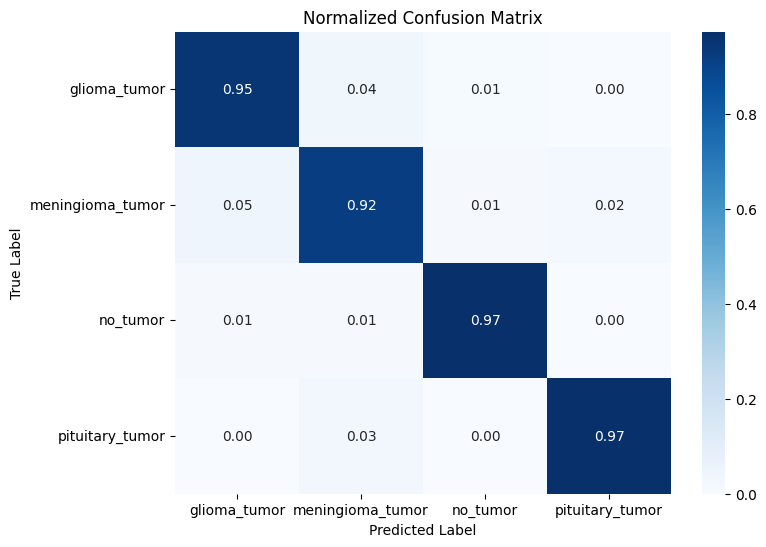

In [10]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)
import matplotlib.pyplot as plt

# ================================
# 📊 Training vs Validation Curves
# ================================
plt.figure(figsize=(12, 5))

# --- Accuracy ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Loss ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

results = model.evaluate(test_ds, verbose=0)
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ================================
# 🔢 Confusion Matrix
# ================================
y_true = []
y_pred = []

for images, labels in test_ds:  # or val_ds if you prefer validation
    preds = model.predict(images, verbose=0)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalized version

plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
